In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [155]:
data = pd.read_csv('Housing.csv')

print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [156]:
print ('Total missing values in data set', sum(data.isna().sum()))
string_columns = data.select_dtypes(include=['object']).columns

Total missing values in data set 0


In [157]:
numeric_cols = data.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
print('Most Correlated Features With price:')
print(corr['price'].sort_values(ascending = False)[:10], '\n')
print ('Most uncorrelated features with price:')
print(corr['price'].sort_values(ascending = False)[-5:])

Most Correlated Features With price:
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64 

Most uncorrelated features with price:
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


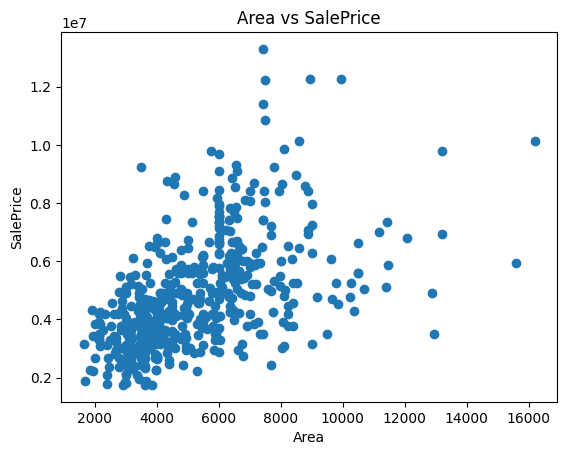

In [158]:
plt.scatter (x =data['area'], y =data['price'])
plt.ylabel('SalePrice')
plt.xlabel('Area')
plt.title('Area vs SalePrice')
plt.show()

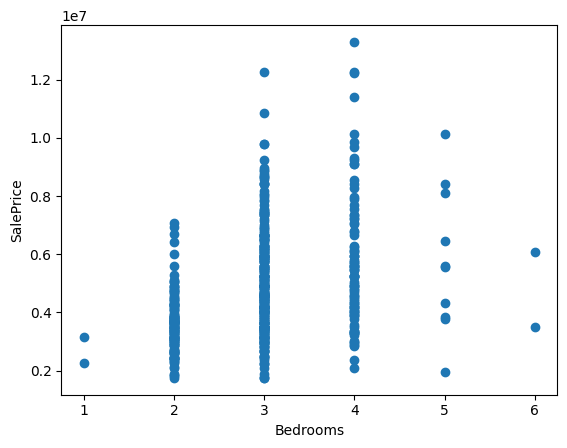

In [159]:
plt.scatter (x =data['bedrooms'], y =data['price'])
plt.ylabel('SalePrice')
plt.xlabel('Bedrooms')
plt.show()

In [160]:
X_train = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y_train = data['price']
X_test = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y_test = data['price']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [161]:
md = LinearRegression()
md.fit(X_train, y_train)

LinearRegression()

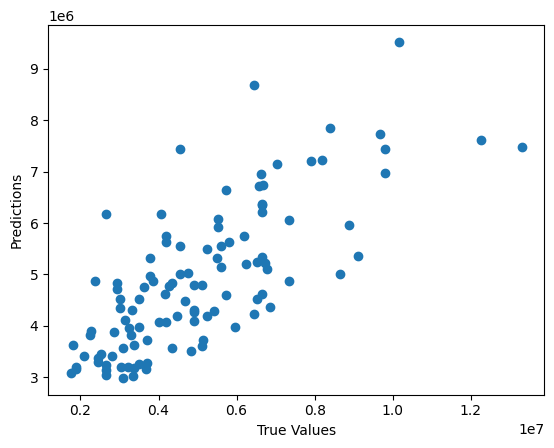

In [162]:
prediction = md.predict(X_test)
plt.scatter(y_test, prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [164]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1127483.352323519
MSE: 2292721545725.3623
RMSE: 1514173.5520492233


In [165]:
try:
    area = float(input("Enter the area of the house: "))
    bedrooms = float(input("Enter the number of bedrooms: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    stories = float(input("Enter the number of stories: "))
    parking = float(input("Enter the number of parking spaces: "))
except ValueError:
    print("Please enter valid numbers.")
else:
    user_input = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'parking': [parking]
    })
    user_prediction = md.predict(user_input)
    print(f"The predicted house price for the given area is: ${user_prediction[0]:,.2f}")

Enter the area of the house:  120000
Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Enter the number of stories: 2
Enter the number of parking spaces: 2
The predicted house price for the given area is: $41,606,761.27
